# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Galih Akbar Nugraha
- **Email:** galihakbar.ga91@gmail.com
- **ID Dicoding:** whoisgalih

## Menentukan Pertanyaan Bisnis

- Bagaimana jumlah peminjaman sepeda per jam berkaitan dengan cuaca tertentu pada bulan Mei 2012?
- Bagaimana pola peminjaman sepeda per hari berubah selama musim dingin tahun 2011-2012?

## Import Semua Packages/Library yang Digunakan

Melakukan import semua library yang dibutuhkan

In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Dataset `day_df`

In [133]:
google_drive_link = "https://drive.google.com/file/d/1-wXf6eiLKQ-x_GzK8mvpuuesiNmjOn0D/view?usp=sharing"
file_id = google_drive_link.split("/")[5]
google_drive_download_link = f"https://drive.google.com/uc?id={file_id}"
day_df = pd.read_csv(google_drive_download_link)

Dataset `hour_df`

In [134]:
google_drive_link = "https://drive.google.com/file/d/1LxA690X2uW-8nPdTNAyVugnYEDRH9JIy/view?usp=share_link"
file_id = google_drive_link.split("/")[5]
google_drive_download_link = f"https://drive.google.com/uc?id={file_id}"
hour_df = pd.read_csv(google_drive_download_link)

### Assessing Data

#### Dataset `day_df`

Memeriksa tipe data data dari tiap kolom yang terdapat dalam `day_df`

In [135]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Tidak terdapat masalah perbedaan jumlah data pada seluruh kolom. untuk memastikan hal ini, kode berikut dijalankan.

In [136]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Masalah selanjutnya yang harus diperiksa ialah duplikasi data. Untuk memeriksa hal ini, bisa dijalankan kode berikut.

In [137]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


Menampilkan ringkasan parameter statistik

In [138]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Dataset `hour_df`

Memeriksa tipe data data dari tiap kolom yang terdapat dalam `hour_df`

In [139]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Tidak terdapat masalah perbedaan jumlah data pada seluruh kolom, untuk memastikan hal ini, kode berikut dijalankan.

In [140]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Masalah selanjutnya yang harus diperiksa ialah duplikasi data. Untuk memeriksa hal ini, bisa dijalankan kode berikut.

In [141]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


Menampilkan ringkasan parameter statistik

In [142]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Cleaning Data

Cleaning data tidak diperlukan karena hasil dari Assessing data menunjukkan bahwa data tersebut sudah dalam kondisi bersih.

## Exploratory Data Analysis (EDA)

### Explore `day_df`

Mendefinisikan musim sesuai [deskripsi dataset](https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset)

In [143]:
season = {
    1: "Springer",
    2: "Summer",
    3: "Fall",
    4: "Winter"
}

Mengubah nilai numerik `season` menjadi nama musim

In [144]:
day_df['season'] = day_df["season"].map(season)

Setelah dimodifikasi, output akan berupa nama-nama musim masing-masing, dan dikelompokkan berdasarkan banyak peminjaman sepeda.

In [145]:
day_df.groupby(by="season").agg({
    "cnt":"size"
})

,cnt
season,
Fall,188
Springer,181
Summer,184
Winter,178


Membuat tabel baru yang berisi urutan hari sejak awal tahun. Hal ini dilakukan karena pertanyaan ke-2 akan membandingan pola peminjaman sepeda saat musim dingin pada tahun 2011 dengan 2012

In [146]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df['day_of_year'] = day_df['dteday'].dt.dayofyear

Mendefinisikan tahun sesuai [deskripsi dataset](https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset)

In [147]:
year = {
    0: 2011,
    1: 2012
}

Mengubah nilai kode `yr` menjadi numerik tahun

In [148]:
day_df['yr'] = day_df["yr"].map(year)

Setelah dimodifikasi, output akan berupa nama-nama cuaca masing-masing, dan dikelompokkan berdasarkan banyak peminjaman sepeda.

In [149]:
day_df.groupby(by="yr").agg({
    "cnt":"size"
})

,cnt
yr,
2011,365
2012,366


### Explore `hour_df`

Mendefinisikan cuaca sesuai [deskripsi dataset](https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset)

In [150]:
weather = {
    1: "Clear",
    2: "Mist",
    3: "Light Snow",
    4: "Heavy Rain"
}

Mengubah nilai numerik `weathersit` menjadi nama cuaca

In [151]:
hour_df['weathersit'] = hour_df["weathersit"].map(weather)

Setelah dimodifikasi, output akan berupa nama-nama cuaca masing-masing, dan dikelompokkan berdasarkan banyak peminjaman sepeda.

In [152]:
hour_df.groupby(by="weathersit").agg({
    "cnt":"size"
})

,cnt
weathersit,
Clear,11413
Heavy Rain,3
Light Snow,1419
Mist,4544


Mendefinisikan tahun sesuai [deskripsi dataset](https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset)

In [153]:
year = {
    0: 2011,
    1: 2012
}

Mengubah nilai kode `yr` menjadi numerik tahun

In [154]:
hour_df['yr'] = hour_df["yr"].map(year)

Setelah dimodifikasi, output akan berupa nama-nama cuaca masing-masing, dan dikelompokkan berdasarkan banyak peminjaman sepeda.

In [155]:
hour_df.groupby(by="yr").agg({
    "cnt":"size"
})

,cnt
yr,
2011,8645
2012,8734


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana jumlah peminjaman sepeda per jam berkaitan dengan cuaca tertentu pada bulan Mei 2012?

Melakukan filter terhadap waktu yang ditentukan yaitu bulan Mei (bulan ke-5) dan tahun 2012

In [156]:
weather_may_2012_df = hour_df[(hour_df['mnth'] == 5) & (hour_df['yr'] == 2012)]

Mengelompokan data berdasarkan weather serta menghitung jumlah peminjaman sepeda

In [157]:
weather_may_2012_df = weather_may_2012_df.groupby('weathersit')['cnt'].sum().reindex(weather.values()).reset_index()

Membuat visualisasi jumlah pmeinjaman sepeda pada setiap situasi cuaca untuk menjawab pertanyaan keterkaitan cuaca dengan peminjaman sepeda pada bulan Mei 2012

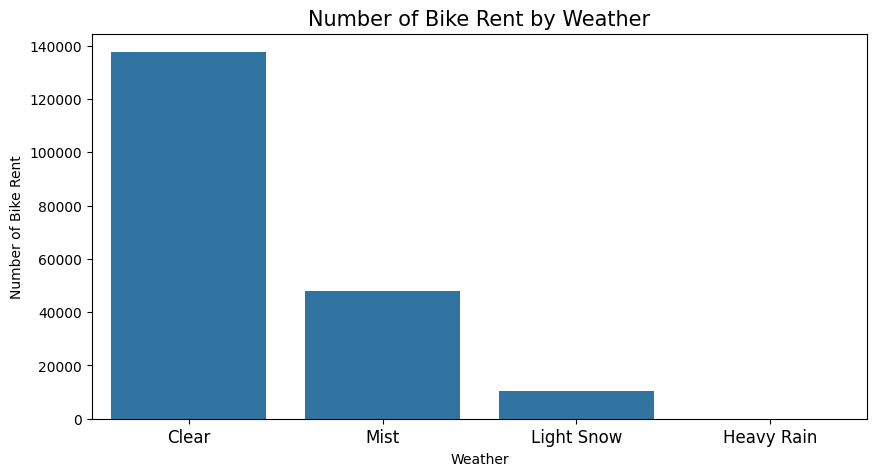

In [158]:
plt.figure(figsize=(10, 5))

sns.barplot(
    y="cnt",
    x="weathersit",
    data=weather_may_2012_df,
    order=weather.values(),
    errorbar=None
)

plt.title("Number of Bike Rent by Weather", loc="center", fontsize=15)
plt.ylabel("Number of Bike Rent")
plt.xlabel("Weather")
plt.tick_params(axis='x', labelsize=12)
plt.show()

### Pertanyaan 2: Bagaimana pola peminjaman sepeda per hari berubah selama musim dingin tahun 2011-2012?

Melakukan filter terhadap waktu yang ditentukan yaitu musim dingin dan tahun 2011. Setelah dilakukan filter, nama kolom `cnt` di ubah menjadi tahun yaitu `2011`.

In [159]:
winter_2011_df = day_df[(day_df['season'] == season[4]) & (day_df['yr'] == 2011)]
winter_2011_df = winter_2011_df.rename(columns={'cnt': '2011'})

Melakukan filter terhadap waktu yang ditentukan yaitu musim dingin dan tahun 2012. Setelah dilakukan filter, nama kolom `cnt` di ubah menjadi tahun yaitu `2012`.

In [160]:
winter_2012_df = day_df[(day_df['season'] == season[4]) & (day_df['yr'] == 2012)]
winter_2012_df = winter_2012_df.rename(columns={'cnt': '2012'})

Melakukan penggabungan data 2011 dan 2012. Penggabungan dilakukan berdasarkan kolom `day_of_year` dengan kolom yang di ikutsertakan adalah kolom `2011` dan `2012`.

In [161]:
winter_2011_2012_df = pd.merge(
    winter_2011_df[['day_of_year', '2011']],
    winter_2012_df[['day_of_year', '2012']],
    on='day_of_year',
    how='inner'
)

Melakukan visualisasi perkembangan peminjaman sepeda selama musim dingin di tahun 2011 dan 2012 untuk menjawab pertanyaan pola peminjaman seepeda dari hari per hari selama musim dingin 2011 dan 2012.

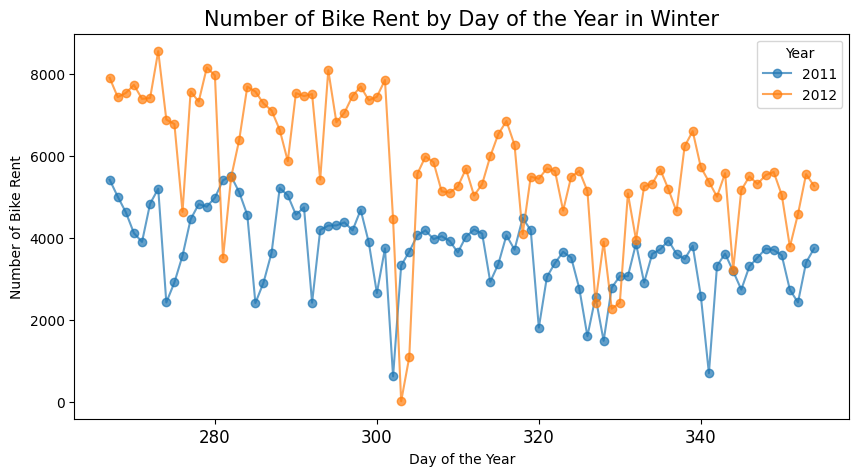

In [162]:
plt.figure(figsize=(10, 5))


plt.plot(
    winter_2011_2012_df["day_of_year"],
    winter_2011_2012_df["2011"],
    marker='o',
    label='2011',
    alpha=0.7
)

plt.plot(
    winter_2011_2012_df["day_of_year"],
    winter_2011_2012_df["2012"],
    marker='o',
    label='2012',
    alpha=0.7
)

plt.title("Number of Bike Rent by Day of the Year in Winter", loc="center", fontsize=15)
plt.ylabel("Number of Bike Rent")
plt.xlabel("Day of the Year")
plt.tick_params(axis='x', labelsize=12)
plt.legend(title='Year')
plt.show()

## Conclusion

- Conclusion Pertanyaan 1: "Bagaimana jumlah peminjaman sepeda per jam berkaitan dengan cuaca tertentu pada bulan Mei 2012?"

  Berdasarkan analisis yang telah dilakukan, terlihat bahwa cuaca memiliki pengaruh yang signifikan terhadap jumlah peminjaman sepeda per jam pada bulan Mei 2012. Pada kondisi cuaca yang cerah ("Clear"), tercatat tingginya aktivitas peminjaman sepeda. Namun, aktivitas ini cenderung menurun saat cuaca memburuk, terutama pada kondisi "Mist" dan "Light Snow", dan tidak ada peminjaman yang terjadi saat cuaca "Heavy Rain".


- Conclusion Pertanyaan 2: "Bagaimana pola peminjaman sepeda per hari berubah selama musim dingin tahun 2011-2012?"

  Dari hasil analisis, terlihat bahwa jumlah peminjaman sepeda per hari mengalami peningkatan selama musim dingin dari tahun 2011 hingga 2012. Meskipun demikian, aktivitas peminjaman sepeda cenderung fluktuatif dan mengalami penurunan relatif dari awal hingga akhir musim dingin. Pola ini terlihat pada kedua tahun, 2011 dan 2012.

## Export Data

In [165]:
hour_df.to_csv("weather_data.csv", index=False)
day_df.to_csv("winter_data.csv", index=False)